<a href="https://colab.research.google.com/github/Bino-01/Air-Line-Passengers/blob/master/PreLabWk3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
# Importing Main Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [150]:
df = pd.read_csv('/content/UKGas_Synthetic.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)
df.head()

,Gas
Date,
1960-03-31,52.179865
1960-06-30,61.900449
1960-09-30,50.833042
1960-12-31,40.481178
1961-03-31,46.764120


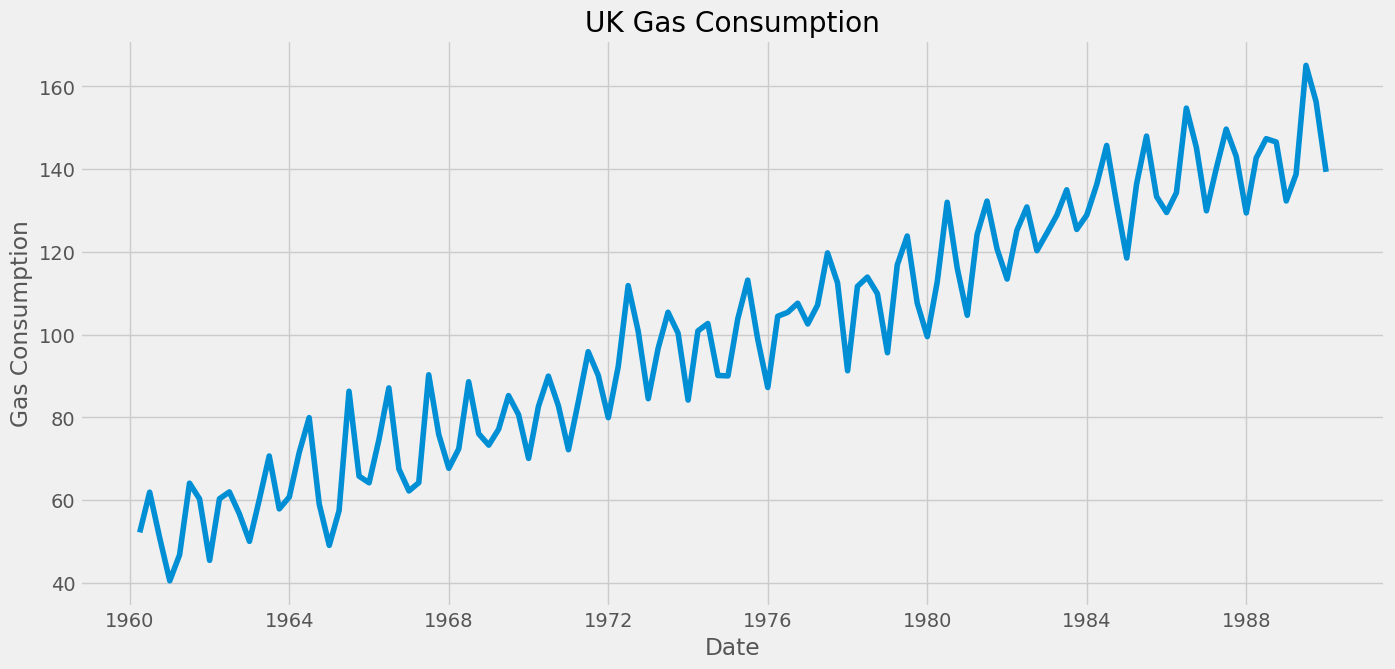

In [151]:
# Plotting the Gas Dataset
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,7), dpi = 100)
plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('UK Gas Consumption')
plt.plot(df)
plt.show()

In [152]:
# Compute 4-quarter Rolling Statistics
df['roll_mean'] = df['Gas'].rolling(window=4).mean()
df['roll_std'] = df['Gas'].rolling(window=4).std()
df['roll_median'] = df['Gas'].rolling(window=4).median()

df

,Gas,roll_mean,roll_std,roll_median
Date,,,,
1960-03-31,52.179865,NaN,NaN,NaN
1960-06-30,61.900449,NaN,NaN,NaN
1960-09-30,50.833042,NaN,NaN,NaN
1960-12-31,40.481178,51.348633,8.763546,51.506454
1961-03-31,46.764120,49.994697,9.007283,48.798581
...,...,...,...,...
1988-12-31,132.305230,142.233927,6.921571,144.637364
1989-03-31,138.762371,141.244739,7.109307,142.658988
1989-06-30,165.084689,145.676974,14.189746,142.658988


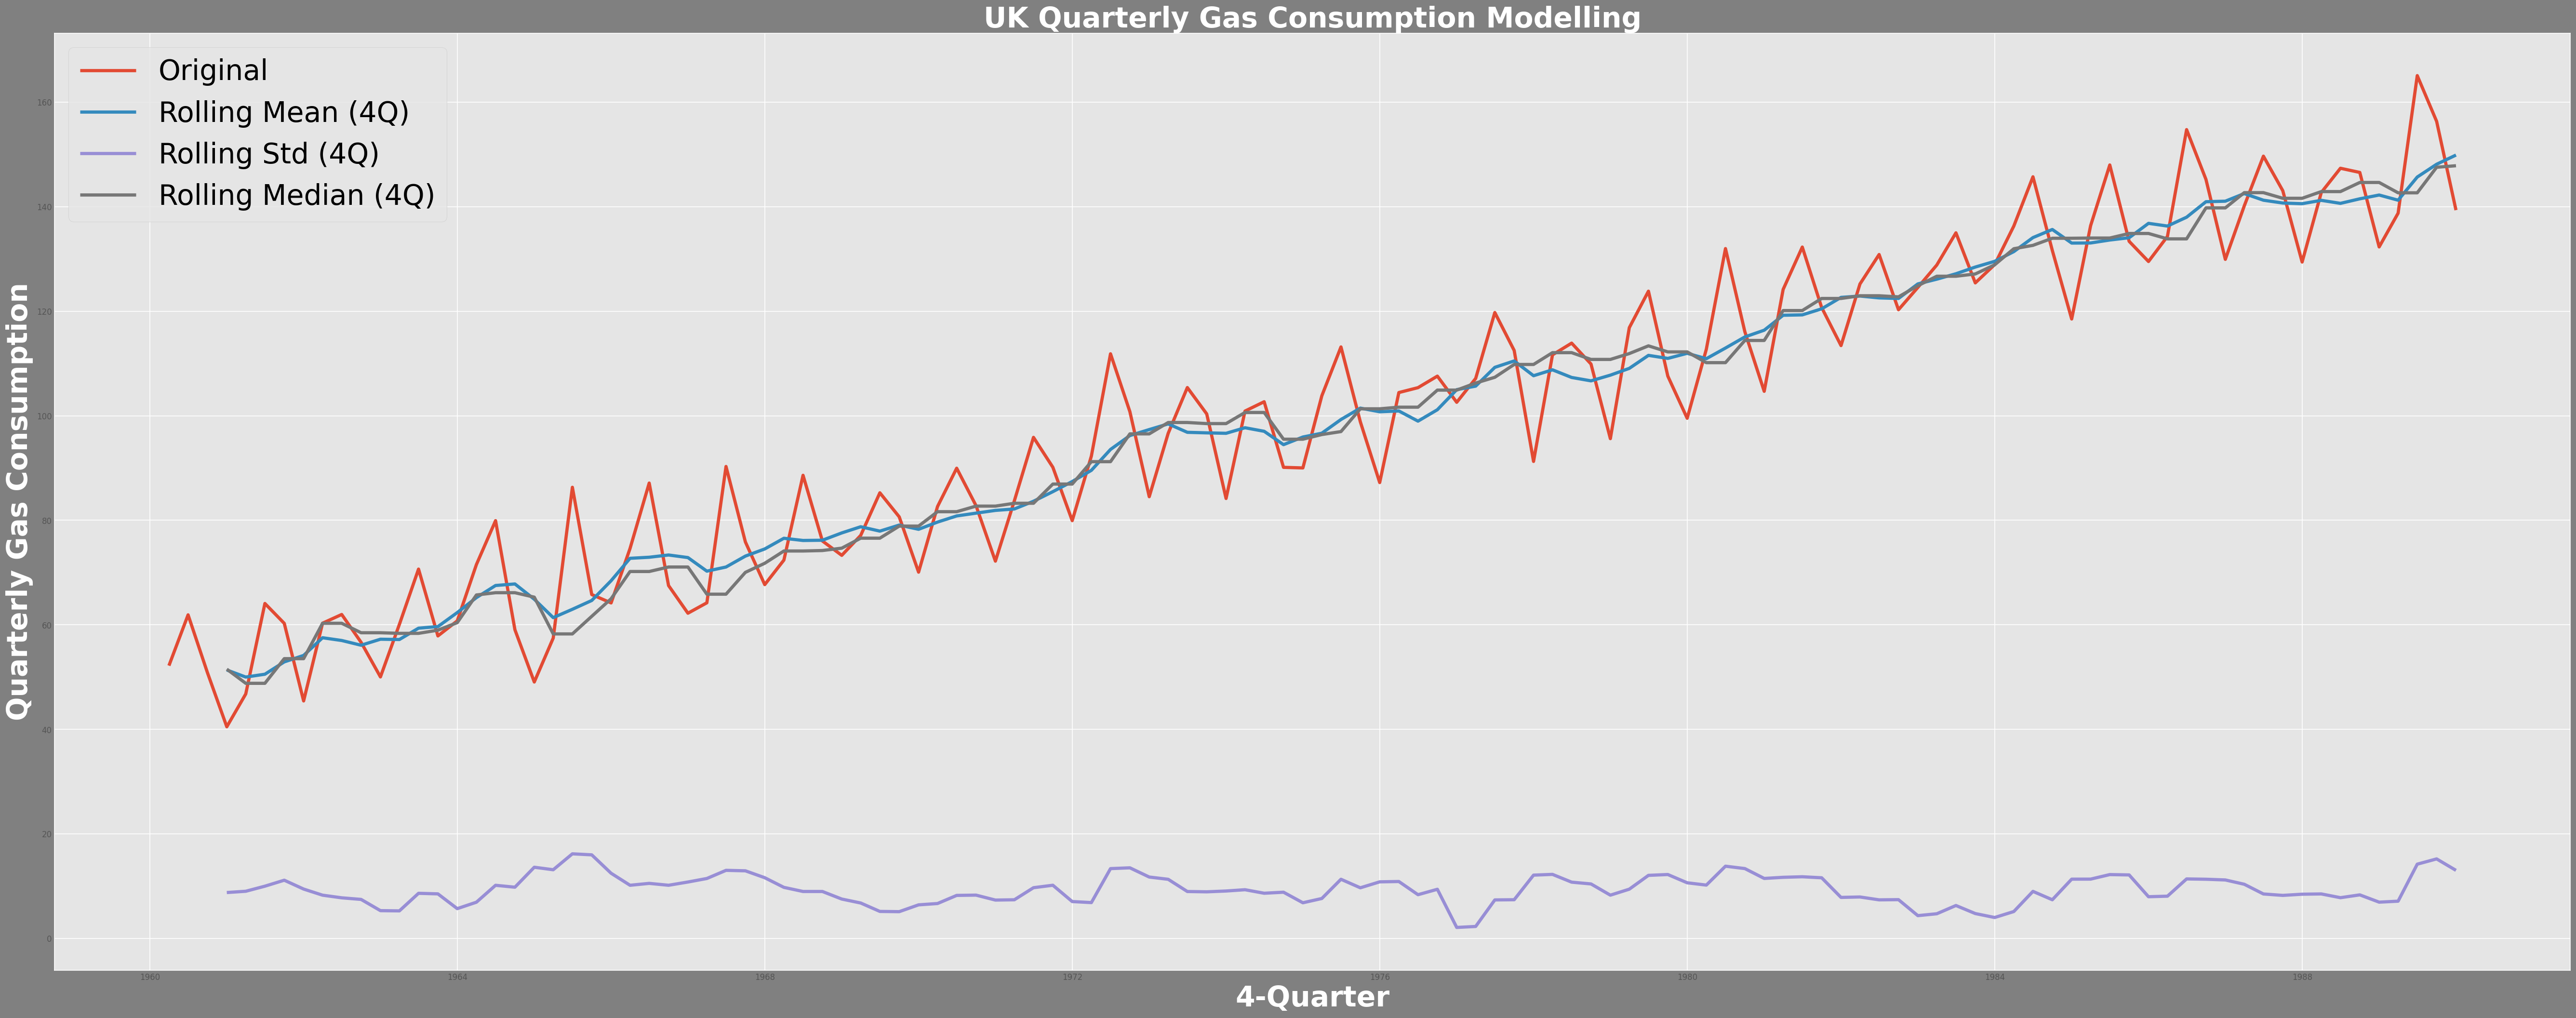

In [153]:
# Plotting the Rolling Statistics
plt.style.use('ggplot')
#plt.rcParams['figure.figsize'] = (50,20)
plt.figure(figsize=(50,20), dpi = 120, facecolor= 'grey', edgecolor= 'black')
plt.plot(df['Gas'], label = 'Original')
plt.plot(df['roll_mean'], label = 'Rolling Mean (4Q)')
plt.plot(df['roll_std'], label = 'Rolling Std (4Q)')
plt.plot(df['roll_median'], label = 'Rolling Median (4Q)')
plt.xlabel('4-Quarter', color = 'white', fontdict = {'fontweight':'bold', 'fontstyle':'normal', 'fontsize':35})
plt.ylabel('Quarterly Gas Consumption', color = 'white', fontdict = {'fontweight':'bold', 'fontstyle':'normal', 'fontsize':35})
plt.title('UK Quarterly Gas Consumption Modelling', color = 'white', fontdict = {'fontweight':'bold', 'fontstyle':'normal', 'fontsize':35})
plt.legend(loc ='best', fontsize = 35)
plt.show()


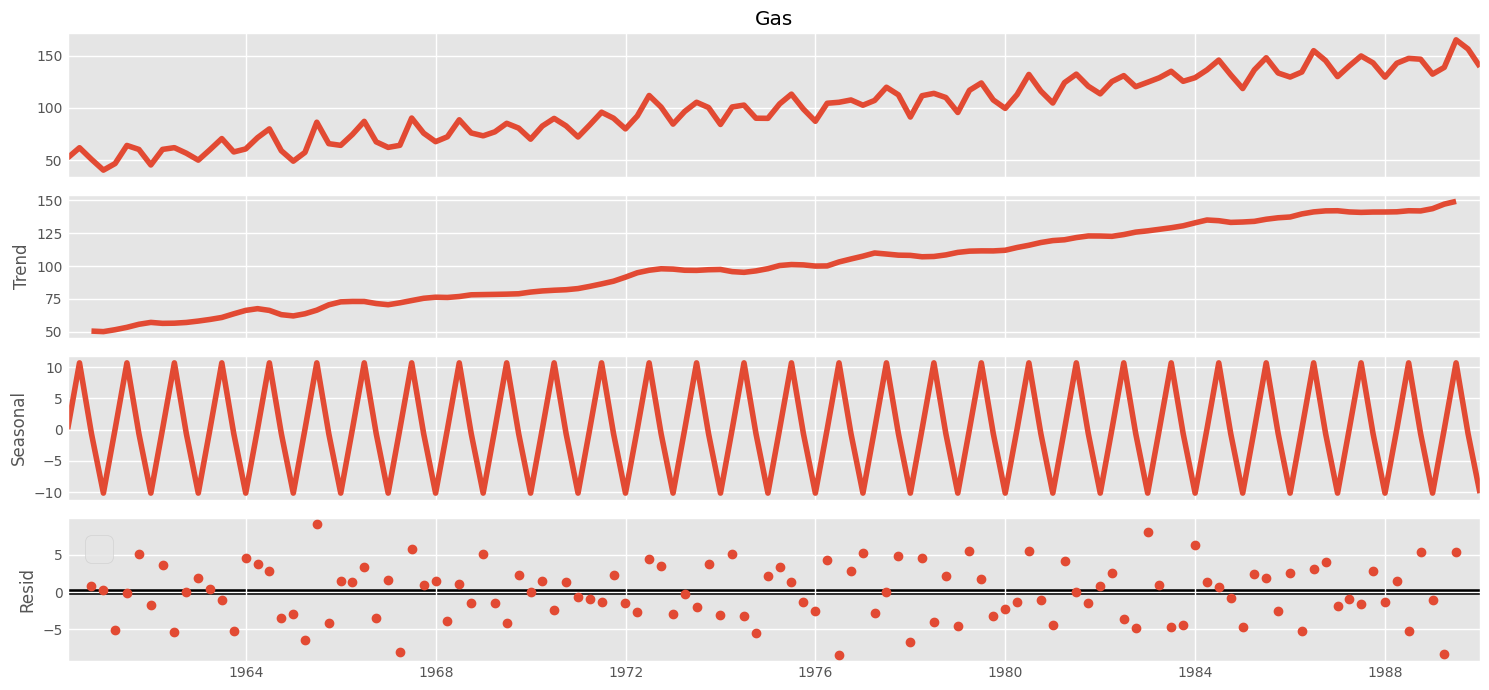

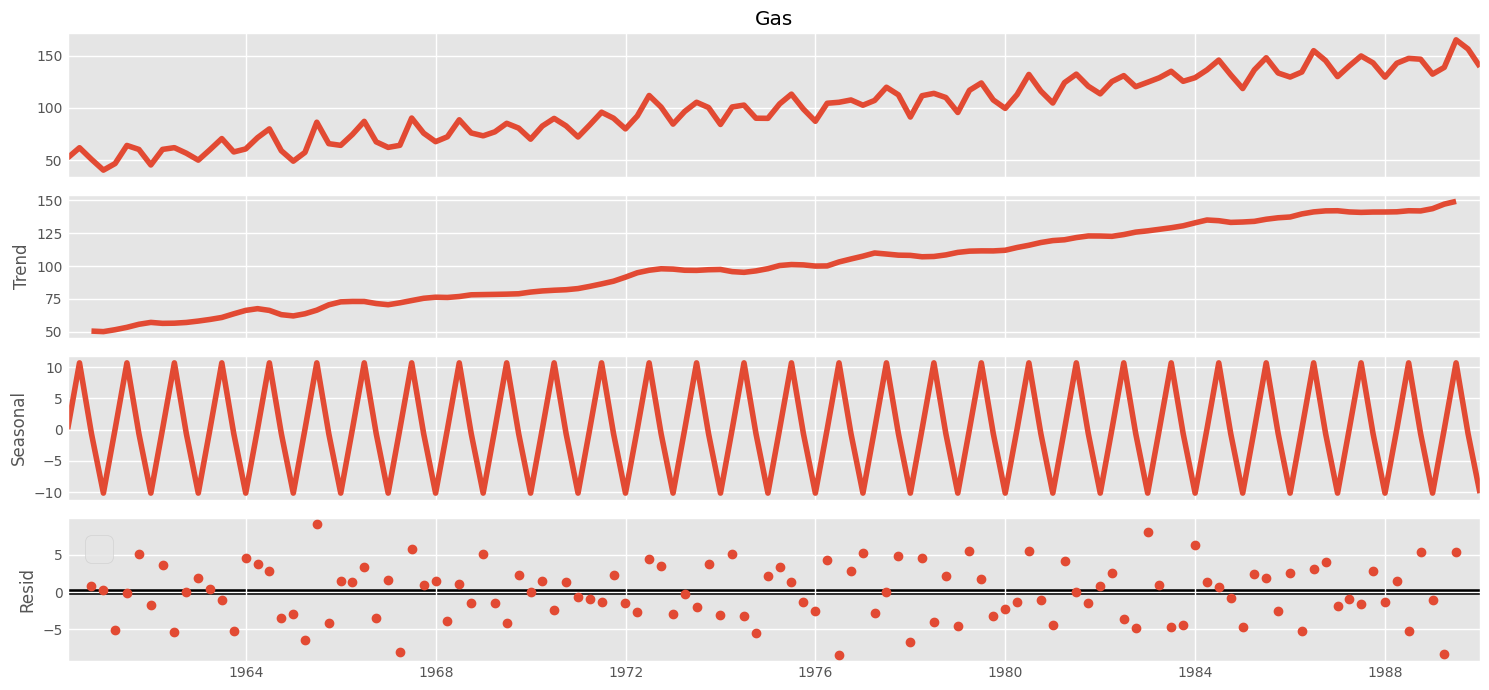

In [154]:
# 5- Additive and Multiplicative Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
add_dec = seasonal_decompose(df['Gas'], model ='Additive Decomposition', period =4)
mul_dec = seasonal_decompose(df['Gas'], model ='Multiplicative Decomposition', period =4)

add_dec.plot(); plt.legend(fontsize = 25); plt.show()
mul_dec.plot(); plt.legend(fontsize = 25); plt.show()


In [155]:
# 6- Comparing Residual Variabilities
add_resid_std = add_dec.resid.std()
mul_resid_std = mul_dec.resid.std()
add_resid_std, mul_resid_std

(3.6973198616841945, 3.6973198616841945)

In [156]:
# 7 - Estimating the Trend Slope

trend = add_dec.trend.dropna() # Droping Missing Values
slope = (trend.iloc[-1] - trend.iloc[0])/trend.iloc[-1]
slope

np.float64(0.659925069210617)

In [157]:
# 8-Splitting the Dataset into Training and Testing Sets (80/20)
train_len = int(len(df)*0.8)
train = df.iloc[:train_len]
test = df.iloc[train_len:]
len(train), len(test)


(96, 24)

In [158]:
# 9-Forecasting Methods
## 9.1 - Naive Forecasting

def naive(series, n):
  return [series.iloc[-1]]*n
naive_pred = naive(train['Gas'], len(test))

In [159]:
## 9.2 Average Forecast
def avg(series, n):
  return [series.mean()]*n
avg_pred = avg(train['Gas'], len(test))

In [160]:
## 9.3 Last-4 Average

def last4(series, n):
    return [ series.iloc[-4:].mean() ] * n

last4_pred = last4(train['Gas'], len(test))

In [161]:
## 9.4 Seasonal Naive Forecast
def seasonal_naive(series, n, season_len=4):
  preds=[]
  for i in range(n):
    preds.append(series.iloc[-season_len + (i % season_len)])
  return preds

seasonal_pred = seasonal_naive(train['Gas'], len(test), 4)

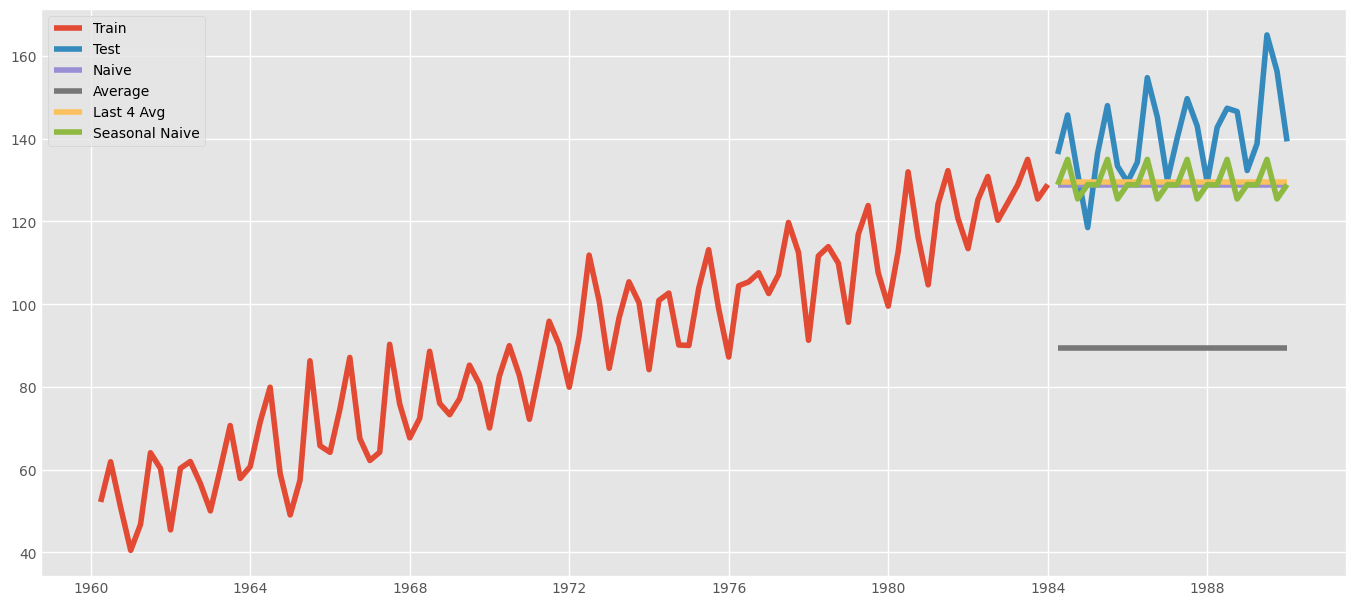

In [162]:
# 10. Plotting All Forecasts
plt.figure(figsize=(15,7), dpi = 100)
plt.plot(train['Gas'], label ='Train')
plt.plot(test['Gas'], label ='Test')
plt.plot(test.index, naive_pred, label ='Naive')
plt.plot(test.index, avg_pred, label ='Average')
plt.plot(test.index, last4_pred, label ='Last 4 Avg')
plt.plot(test.index, seasonal_pred, label ='Seasonal Naive')
plt.legend(loc ='best')
plt.show()

In [163]:
# 11. Accuracy Metrics
def mae(a,p):
  return np.mean(np.abs(a - p))

def mape(a,p):
  return np.mean(np.abs(a - p)/a) * 100



In [164]:
# Compute the Metrics
rmse_naive = np.sqrt( mean_squared_error(test['Gas'], naive_pred) )
rmse_avg   = np.sqrt( mean_squared_error(test['Gas'], avg_pred) )
rmse_last4 = np.sqrt( mean_squared_error(test['Gas'], last4_pred) )
rmse_seas  = np.sqrt( mean_squared_error(test['Gas'], seasonal_pred) )

mae_naive = mae(test['Gas'], naive_pred)
mae_avg   = mae(test['Gas'], avg_pred)
mae_last4 = mae(test['Gas'], last4_pred)
mae_seas  = mae(test['Gas'], seasonal_pred)

mape_naive = mape(test['Gas'], naive_pred)
mape_avg   = mape(test['Gas'], avg_pred)
mape_last4 = mape(test['Gas'], last4_pred)
mape_seas  = mape(test['Gas'], seasonal_pred)

In [165]:
# Build a Forecast Comparison Table
results = pd.DataFrame({
    'Method':['Naive','Average','Last4','Seasonal'],
    'RMSE':[rmse_naive, rmse_avg, rmse_last4, rmse_seas],
    'MAE':[mae_naive, mae_avg, mae_last4, mae_seas],
    'MAPE':[mape_naive, mape_avg, mape_last4, mape_seas]
})
results


,Method,RMSE,MAE,MAPE
0,Naive,15.455405,12.551821,8.569162
1,Average,52.103646,51.112171,36.024581
2,Last4,14.986012,11.989408,8.174618
3,Seasonal,14.356362,11.923491,8.193240


In [168]:
# Improvement vs Naive (RMSE)
results['Improvement_vs_Naive_%'] = (
    ( results['RMSE'][0] - results['RMSE'] ) / results['RMSE'][0]
) * 100
results

,Method,RMSE,MAE,MAPE,Improvement_vs_Naive_%
0,Naive,15.455405,12.551821,8.569162,0.000000
1,Average,52.103646,51.112171,36.024581,-237.122495
2,Last4,14.986012,11.989408,8.174618,3.037078
3,Seasonal,14.356362,11.923491,8.193240,7.111056
